In [1]:
from Bio import SeqIO
import pandas as pd

def fasta_to_csv(fasta_path, csv_path):
    records = []
    for record in SeqIO.parse(fasta_path, "fasta"):
        header = record.description
        seq = str(record.seq)

        # Label is at the end (A-0 = Insoluble, A-1 = Soluble)
        if header.endswith("A-0"):
            label = "Insoluble"
        elif header.endswith("A-1"):
            label = "Soluble"
        else:
            label = "Unknown"

        records.append({"sequence": seq, "label": label})

    df = pd.DataFrame(records)
    df.to_csv(csv_path, index=False)
    print(f"Saved {len(df)} sequences to {csv_path}")

# Example: Convert training fasta
fasta_to_csv("../data/Violet969-PLM_Sol-3589a95/embedding_dataset/Train_dataset.fasta",
             "../data/train_dataset.csv")


Saved 70031 sequences to ../data/train_dataset.csv


In [2]:
# Convert validation set
fasta_to_csv("../data/Violet969-PLM_Sol-3589a95/embedding_dataset/validation_dataset.fasta",
             "../data/validation_dataset.csv")

# Convert test set
fasta_to_csv("../data/Violet969-PLM_Sol-3589a95/embedding_dataset/test_dataset.fasta",
             "../data/test_dataset.csv")


Saved 4000 sequences to ../data/validation_dataset.csv
Saved 4000 sequences to ../data/test_dataset.csv


In [3]:
import pandas as pd

train = pd.read_csv("../data/train_dataset.csv")
val = pd.read_csv("../data/validation_dataset.csv")
test = pd.read_csv("../data/test_dataset.csv")

print("TRAIN shape:", train.shape)
print(train['label'].value_counts(), "\n")

print("VALIDATION shape:", val.shape)
print(val['label'].value_counts(), "\n")

print("TEST shape:", test.shape)
print(test['label'].value_counts(), "\n")


TRAIN shape: (70031, 2)
label
Soluble      42450
Insoluble    27581
Name: count, dtype: int64 

VALIDATION shape: (4000, 2)
label
Insoluble    2000
Soluble      2000
Name: count, dtype: int64 

TEST shape: (4000, 2)
label
Insoluble    2000
Soluble      2000
Name: count, dtype: int64 



In [4]:
train['seq_length'] = train['sequence'].str.len()
print(train['seq_length'].describe())

val['seq_length'] = val['sequence'].str.len()
test['seq_length'] = test['sequence'].str.len()


count    70031.000000
mean       296.768674
std        227.740638
min         25.000000
25%        145.000000
50%        239.000000
75%        376.000000
max       2500.000000
Name: seq_length, dtype: float64


In [5]:
import numpy as np

AMINO_ACIDS = list("ACDEFGHIKLMNPQRSTVWY")

def aa_composition(seq):
    counts = {aa: 0 for aa in AMINO_ACIDS}
    for aa in seq:
        if aa in counts:
            counts[aa] += 1
    length = len(seq)
    return {aa: counts[aa] / length for aa in AMINO_ACIDS}

# Example: compute for first 3 sequences
for i in range(3):
    print(aa_composition(train['sequence'].iloc[i]))


{'A': 0.11392405063291139, 'C': 0.015822784810126583, 'D': 0.04430379746835443, 'E': 0.06329113924050633, 'F': 0.028481012658227847, 'G': 0.06962025316455696, 'H': 0.028481012658227847, 'I': 0.04746835443037975, 'K': 0.0189873417721519, 'L': 0.09177215189873418, 'M': 0.02531645569620253, 'N': 0.00949367088607595, 'P': 0.06645569620253164, 'Q': 0.05063291139240506, 'R': 0.06329113924050633, 'S': 0.060126582278481014, 'T': 0.08860759493670886, 'V': 0.08227848101265822, 'W': 0.0031645569620253164, 'Y': 0.028481012658227847}
{'A': 0.08888888888888889, 'C': 0.016666666666666666, 'D': 0.06666666666666667, 'E': 0.03888888888888889, 'F': 0.03333333333333333, 'G': 0.07222222222222222, 'H': 0.027777777777777776, 'I': 0.06666666666666667, 'K': 0.03333333333333333, 'L': 0.15, 'M': 0.016666666666666666, 'N': 0.027777777777777776, 'P': 0.03333333333333333, 'Q': 0.044444444444444446, 'R': 0.06666666666666667, 'S': 0.05555555555555555, 'T': 0.07777777777777778, 'V': 0.05555555555555555, 'W': 0.0, 'Y':

In [15]:
from IPython.display import display

def build_features(df):
    features = df['sequence'].apply(aa_composition).apply(pd.Series)
    features['label'] = df['label']
    return features

train_feats = build_features(train)
val_feats = build_features(val)
test_feats = build_features(test)

print("Train features shape:", train_feats.shape)
print("Validation features shape:", val_feats.shape)
print("Test features shape:", test_feats.shape)

display(train_feats.head())


Train features shape: (70031, 21)
Validation features shape: (4000, 21)
Test features shape: (4000, 21)


,A,C,D,E,F,G,H,I,K,L,...,N,P,Q,R,S,T,V,W,Y,label
0,0.113924,0.015823,0.044304,0.063291,0.028481,0.069620,0.028481,0.047468,0.018987,0.091772,...,0.009494,0.066456,0.050633,0.063291,0.060127,0.088608,0.082278,0.003165,0.028481,Insoluble
1,0.088889,0.016667,0.066667,0.038889,0.033333,0.072222,0.027778,0.066667,0.033333,0.150000,...,0.027778,0.033333,0.044444,0.066667,0.055556,0.077778,0.055556,0.000000,0.027778,Insoluble
2,0.101562,0.023438,0.078125,0.070312,0.015625,0.031250,0.007812,0.085938,0.070312,0.117188,...,0.039062,0.023438,0.062500,0.039062,0.039062,0.062500,0.046875,0.007812,0.039062,Insoluble
3,0.035088,0.017544,0.078947,0.105263,0.052632,0.026316,0.026316,0.087719,0.061404,0.140351,...,0.061404,0.026316,0.035088,0.017544,0.026316,0.070175,0.026316,0.008772,0.078947,Insoluble
4,0.099548,0.004525,0.045249,0.067873,0.040724,0.058824,0.018100,0.076923,0.067873,0.099548,...,0.036199,0.031674,0.045249,0.067873,0.067873,0.045249,0.063348,0.013575,0.040724,Insoluble


In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Prepare data
X_train = train_feats.drop(columns=['label'])
y_train = train_feats['label'].map({'Soluble':1, 'Insoluble':0})

X_test = test_feats.drop(columns=['label'])
y_test = test_feats['label'].map({'Soluble':1, 'Insoluble':0})

# Pipeline + train
pipe = Pipeline([('scaler', StandardScaler()), ('clf', LogisticRegression(max_iter=1000, class_weight='balanced'))])
pipe.fit(X_train, y_train)

# Predict & evaluate
y_pred = pipe.predict(X_test)
y_proba = pipe.predict_proba(X_test)[:,1]

print("Classification report (Test):")
print(classification_report(y_test, y_pred))
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))
print("ROC AUC (Test):", round(roc_auc_score(y_test, y_proba), 4))


Classification report (Test):
              precision    recall  f1-score   support

           0       0.57      0.58      0.58      2000
           1       0.58      0.57      0.57      2000

    accuracy                           0.58      4000
   macro avg       0.58      0.58      0.58      4000
weighted avg       0.58      0.58      0.58      4000

Confusion matrix:
[[1168  832]
 [ 864 1136]]
ROC AUC (Test): 0.6006


In [17]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=300, max_depth=None, random_state=42, n_jobs=-1, class_weight='balanced')
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:,1]

print("Classification report (Random Forest):")
print(classification_report(y_test, y_pred_rf))
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("ROC AUC (Test):", round(roc_auc_score(y_test, y_proba_rf), 4))


Classification report (Random Forest):
              precision    recall  f1-score   support

           0       0.76      0.27      0.39      2000
           1       0.56      0.92      0.69      2000

    accuracy                           0.59      4000
   macro avg       0.66      0.59      0.54      4000
weighted avg       0.66      0.59      0.54      4000

Confusion matrix:
[[ 531 1469]
 [ 164 1836]]
ROC AUC (Test): 0.6938


Top 10 most important amino acids/features:
E    0.057121
R    0.054209
C    0.053245
N    0.052454
D    0.051617
M    0.051342
K    0.051207
I    0.050475
A    0.050379
S    0.050309
dtype: float64


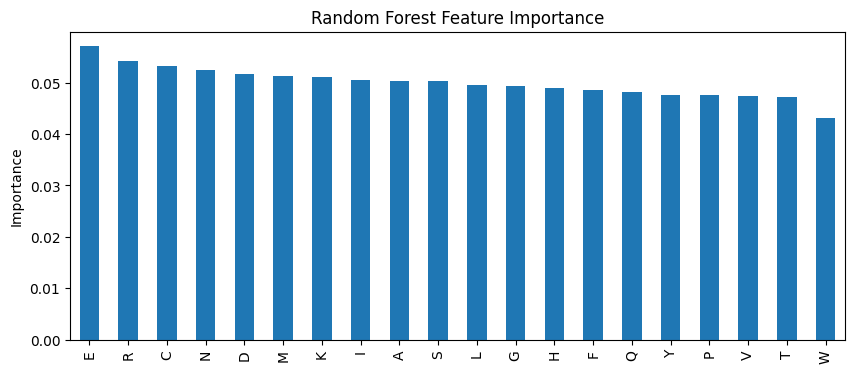

In [18]:
import pandas as pd

fi = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print("Top 10 most important amino acids/features:")
print(fi.head(10))

# Plot importance
import matplotlib.pyplot as plt
fi.plot(kind='bar', figsize=(10,4))
plt.title("Random Forest Feature Importance")
plt.ylabel("Importance")
plt.show()


In [19]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=(len(y_train)-sum(y_train))/sum(y_train),  # handle imbalance
    random_state=42,
    n_jobs=-1,
    eval_metric="logloss"
)

xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)
y_proba_xgb = xgb.predict_proba(X_test)[:,1]

print("Classification report (XGBoost):")
print(classification_report(y_test, y_pred_xgb))
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred_xgb))
print("ROC AUC (Test):", round(roc_auc_score(y_test, y_proba_xgb), 4))


Classification report (XGBoost):
              precision    recall  f1-score   support

           0       0.66      0.56      0.60      2000
           1       0.62      0.72      0.66      2000

    accuracy                           0.64      4000
   macro avg       0.64      0.64      0.63      4000
weighted avg       0.64      0.64      0.63      4000

Confusion matrix:
[[1111  889]
 [ 565 1435]]
ROC AUC (Test): 0.6979


In [20]:
# Kyte-Doolittle hydropathy scale
hydropathy = {
    'A': 1.8,  'C': 2.5,  'D': -3.5, 'E': -3.5, 'F': 2.8,
    'G': -0.4, 'H': -3.2, 'I': 4.5,  'K': -3.9, 'L': 3.8,
    'M': 1.9,  'N': -3.5, 'P': -1.6, 'Q': -3.5, 'R': -4.5,
    'S': -0.8, 'T': -0.7, 'V': 4.2,  'W': -0.9, 'Y': -1.3
}

def add_physchem_features(df):
    df = df.copy()
    df['seq_length'] = df['sequence'].str.len()
    df['hydrophobicity'] = df['sequence'].apply(lambda s: sum(hydropathy.get(aa,0) for aa in s) / len(s))
    df['aromatic_fraction'] = df['sequence'].apply(lambda s: sum(s.count(aa) for aa in "FWY") / len(s))
    return df

train_extra = add_physchem_features(train)
val_extra = add_physchem_features(val)
test_extra = add_physchem_features(test)

train_extra.head()


,sequence,label,seq_length,hydrophobicity,aromatic_fraction
0,MSDHRAITLEGTTVMVPVYNSTAQQSPYQLTTTADGGVALHHQGEL...,Insoluble,316,-0.040823,0.060127
1,MALIIAGERSGVGKTTTTLTLLAALKARQASVQSFKVGPDYIDPMF...,Insoluble,180,0.071667,0.061111
2,MTMATINARIDDDIKNQADEVLKLMNISQTQAIAAFYQYITEQKKL...,Insoluble,128,-0.144531,0.062500
3,MTLSKQLNTYITERFKLNYQETWACETVDAMAEDVLPEKYIKNSPL...,Insoluble,114,-0.292105,0.140351
4,MKRVLVLGATGRTGSFVIKELSKYKSIQLIAGLRSQKDKERLPKIN...,Insoluble,221,-0.222172,0.095023


In [21]:
# Merge AA composition with physchem features
def build_full_features(seq_df, feats_df):
    aa_feats = seq_df['sequence'].apply(aa_composition).apply(pd.Series)
    aa_feats['seq_length'] = feats_df['seq_length']
    aa_feats['hydrophobicity'] = feats_df['hydrophobicity']
    aa_feats['aromatic_fraction'] = feats_df['aromatic_fraction']
    aa_feats['label'] = seq_df['label']
    return aa_feats

train_full = build_full_features(train, train_extra)
val_full   = build_full_features(val, val_extra)
test_full  = build_full_features(test, test_extra)

X_train = train_full.drop(columns=['label'])
y_train = train_full['label'].map({'Soluble':1, 'Insoluble':0})

X_test = test_full.drop(columns=['label'])
y_test = test_full['label'].map({'Soluble':1, 'Insoluble':0})

# Retrain XGBoost with extended features
xgb2 = XGBClassifier(
    n_estimators=600,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=(len(y_train)-sum(y_train))/sum(y_train),
    random_state=42,
    n_jobs=-1,
    eval_metric="logloss"
)

xgb2.fit(X_train, y_train)

y_pred_xgb2 = xgb2.predict(X_test)
y_proba_xgb2 = xgb2.predict_proba(X_test)[:,1]

print("Classification report (XGBoost + PhysChem):")
print(classification_report(y_test, y_pred_xgb2))
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred_xgb2))
print("ROC AUC (Test):", round(roc_auc_score(y_test, y_proba_xgb2), 4))


Classification report (XGBoost + PhysChem):
              precision    recall  f1-score   support

           0       0.70      0.58      0.63      2000
           1       0.64      0.76      0.69      2000

    accuracy                           0.67      4000
   macro avg       0.67      0.67      0.66      4000
weighted avg       0.67      0.67      0.66      4000

Confusion matrix:
[[1152  848]
 [ 488 1512]]
ROC AUC (Test): 0.7283


Top 15 most important features:
seq_length        0.096453
C                 0.060650
R                 0.054387
E                 0.053523
N                 0.046953
hydrophobicity    0.044865
D                 0.044190
I                 0.043747
A                 0.042425
G                 0.040725
M                 0.039355
S                 0.038909
K                 0.038498
H                 0.038137
Y                 0.037899
dtype: float32


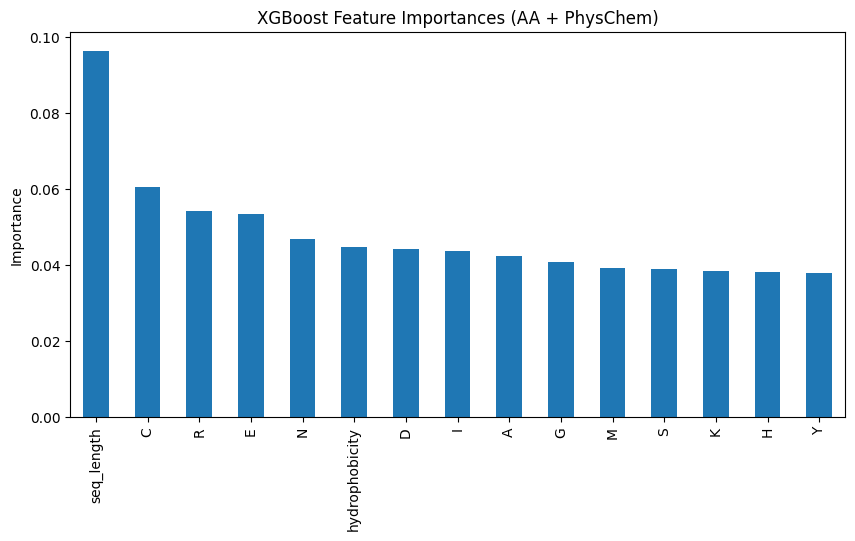

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importances
fi = pd.Series(xgb2.feature_importances_, index=X_train.columns).sort_values(ascending=False)

print("Top 15 most important features:")
print(fi.head(15))

# Plot
plt.figure(figsize=(10,5))
fi.head(15).plot(kind='bar')
plt.title("XGBoost Feature Importances (AA + PhysChem)")
plt.ylabel("Importance")
plt.show()
